# Convolutional Neural Network info

- The goal of the next convolutional neural networks will be to classify and detect images or specific objects from within the image.


CONCEPTS:
- Image data
- Convolutional Layer
- Pooling Layer
- CNN Architectures

### Image Data

Image data that is usually made up of 3 dimensions. These dimensions are as follows:
1. Image height
2. Image Wisth
3. Color channels : the number of color channels represents the depth of an image and coorelates to the colors used in it.

### Convolutional Layer

The main difference between a dense layer and a convolutional layer in that dense layers detect patterns globally while convolutional layers detects patterns locally. 
- Dense layers are capable of analize the data in a global capacity
- Convolutional layers can detect local patterns using part of the data.

The patterns are detected by different filters. --> response map

# Convnet

The problem is classifying 10 different veryday objects. The dataset is called CIFAR Image Dataset. It contains 60,000 32*32 color images of each class. The lables in this dataset are the following:
1. Airplane
2. Automobile
3. Bird
4. Cat
5. Deer
6. Dog
7. Frog
8. Horse
9. Ship
10. Truck

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
#load and split datset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

#normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 15s 0us/step


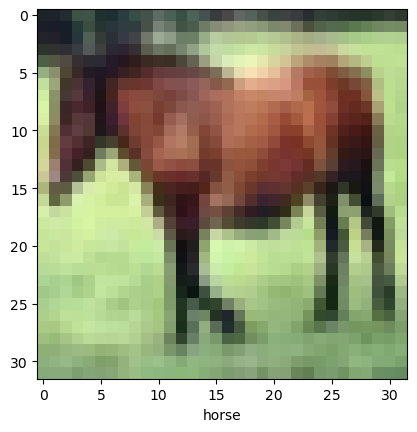

In [5]:
#let's look at a one image
IMG_INDEX = 7
plt.imshow(train_images[IMG_INDEX], cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

### CNN Architecture

- A stack of Conv2D and MaxPooling2D layers folowed by a few denesly connected layers.


In [6]:
#arquitectura comun en modelos de reconocimiento de imagenes, adecuada para reconocer patrones complejos en imagenes pequenas

model = models.Sequential() #contenedor lineal en el q se pueden apilar capas (las capas se a;aden en el orden en el que se definen)
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3))) #32 filtros de 3*3, imagen de 32*32pixeles con 3 canales de color RGB
model.add(layers.MaxPooling2D((2,2))) #capa que reduce la dimension de los mapas de caract. --> filtro de 2*2 para reducir la resolucion
model.add(layers.Conv2D(64, (3,3) , activation='relu')) #64 filtros de 3*3 pixeles
model.add(layers.MaxPooling2D((2,2))) #reduce aun mas la dimensionalidad de los mapas de caracteristicas
model.add(layers.Conv2D(64, (3,3) , activation='relu')) #64 filtros e 3*3 pixeles

#relu (si la  entrada es negativa o 0, la salida es 0 --> si la entrada es pos , la salida es pos)

#las capas convolucionales detectan caracteristicas cada vez mas complejas en la imagen
# las capas de pooling reducen la dimensionalidad de los datos, haciendolos mas manejables para las capas posteriores

c:\Users\VICTUS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

We can notice that the depth of our image increases but the spacial dimensions reduce drastically

### Adding Dense Layers

In [8]:
model.add(layers.Flatten()) #aplana las salidas de las capas convolucionales y de pooling previas
model.add(layers.Dense(64, activation='relu')) #fully connected
model.add(layers.Dense(10)) #capa de salida del modelo

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

Final output layer of 10 neurons

# Training

In [10]:
model.compile(optimizer='adam', #optimizador
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), #cuan bien se desempe;a el modelo
              metrics=['accuracy'])

history = model.fit (train_images, train_labels, epochs=4, validation_data=(test_images, test_labels))

Epoch 1/4
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.3452 - loss: 1.7673 - val_accuracy: 0.5314 - val_loss: 1.2931
Epoch 2/4
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.5611 - loss: 1.2253 - val_accuracy: 0.6265 - val_loss: 1.0547
Epoch 3/4
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6277 - loss: 1.0484 - val_accuracy: 0.6428 - val_loss: 1.0033
Epoch 4/4
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6688 - loss: 0.9369 - val_accuracy: 0.6731 - val_loss: 0.9354
